In [116]:
from typing_extensions import TypedDict

class State(TypedDict):
    info:str

In [117]:
def start_play(state:State):
    return {"info":state["info"]}


In [118]:
def badminton(state:State):
    return {"info":state["info"]+"We are planning to play badminton."}

In [119]:
def football(state:State):
    return {"info":state["info"]+"We are  planning to play football."}

In [120]:
import random
from typing import Literal

def random_play(state:State)-> Literal['football','badminton']:
    info=state['info']

    if random.random()>0.5:
        return "football"
    else:
        return "badminton"

In [121]:
from langgraph.graph import StateGraph,START,END


In [122]:

graph_builder=StateGraph(State)

In [123]:
graph_builder.add_node("start_play",start_play)
graph_builder.add_node("badminton",badminton)
graph_builder.add_node("football",football)


graph_builder.add_edge(START,"start_play")
graph_builder.add_conditional_edges("start_play",random_play)
graph_builder.add_edge("badminton",END)
graph_builder.add_edge("football",END)



graph=graph_builder.compile()




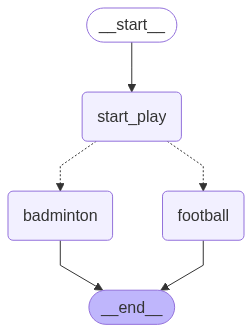

In [124]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except:
  Pass

In [129]:
graph.invoke({"info": "what are we playing today?  "})

{'info': 'what are we playing today?  We are planning to play badminton.'}